In [73]:
import numpy as np
import json
from collections import defaultdict
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

In [62]:
MODEL_PATH = "/Users/siva/Documents/CS506/CS506_project/Model/results.npy"
DATA_PATH = "/Users/siva/Documents/CS506/datasets/yelp_dataset/review.json"
DATA_BUSINESS_PATH = "/Users/siva/Documents/CS506/datasets/yelp_dataset/business.json"

In [4]:
LDA_results = np.load(MODEL_PATH).item()

In [5]:
no_of_restaurants_for_comparison = 20
list_of_restaurants = np.array(list(LDA_results.keys()))
random_restaurants_indices = np.random.choice(len(list(LDA_results.keys())),no_of_restaurants_for_comparison)

In [7]:
print("Randomly picked restaurants:")
#random_restaurants = list_of_restaurants[random_restaurants_indices]
random_restaurants = ['0N2y8rNxbet6p4UIBWTOrw','YTCCJ3ShO-zg0dlx1nk6dw','S3-Zmeg2FALMsx9GhHJ5HQ'
 ,'FIs33y1BVzzcfrDDHh8O5g','F5BCXUpQpCRPeFmWnQmSJA','mShOJ9qFk79KnZq7E8k9hQ',
 'ZbB_yG9cEda5_n3Q0zQL7Q','uoZwJJaplLsktVrRw0JiQw','NWjJK9c5YOQSbMX_bw24sA',
 'CkncJJ9tKgsGULXTTKmfdw','Z0CQ9oJySxJpB8RbK6NUgg','pHJu8tj3sI8eC5aIHLFEfQ',
 'Ggh9JwuIwPBiMmx16kAiug','HaNUXh5nYR0r7FrbFJSHXw','kCF3AuV-2LowMdVlklLy7A',
 'q3YnYPjLuBGRDi_59yTC5g','nJUsNx-LKAZ0FHGm9mnmaw','VwvIq1dyWje3j1i7lp-8sA',
 'pxv5jBUOgsg6Rf6Z88e4mg','rnvsL0oFZpzpO61GXqBF6g']
print(random_restaurants)

Randomly picked restaurants:
['0N2y8rNxbet6p4UIBWTOrw', 'YTCCJ3ShO-zg0dlx1nk6dw', 'S3-Zmeg2FALMsx9GhHJ5HQ', 'FIs33y1BVzzcfrDDHh8O5g', 'F5BCXUpQpCRPeFmWnQmSJA', 'mShOJ9qFk79KnZq7E8k9hQ', 'ZbB_yG9cEda5_n3Q0zQL7Q', 'uoZwJJaplLsktVrRw0JiQw', 'NWjJK9c5YOQSbMX_bw24sA', 'CkncJJ9tKgsGULXTTKmfdw', 'Z0CQ9oJySxJpB8RbK6NUgg', 'pHJu8tj3sI8eC5aIHLFEfQ', 'Ggh9JwuIwPBiMmx16kAiug', 'HaNUXh5nYR0r7FrbFJSHXw', 'kCF3AuV-2LowMdVlklLy7A', 'q3YnYPjLuBGRDi_59yTC5g', 'nJUsNx-LKAZ0FHGm9mnmaw', 'VwvIq1dyWje3j1i7lp-8sA', 'pxv5jBUOgsg6Rf6Z88e4mg', 'rnvsL0oFZpzpO61GXqBF6g']


In [63]:
restaurant_names = {}
with open(DATA_BUSINESS_PATH) as b_json:
    for line in b_json:
        data = json.loads(line)
        if data["business_id"] in random_restaurants:
            restaurant_names[data["business_id"]] = data["name"]

In [8]:
#Handpicking the restaurants topics
restaurants_and_reviews_handpicked = defaultdict(list)
with open(DATA_PATH) as review_file:
    for i,each_review in enumerate(review_file):
        if i % 1000000 == 0:
            print(i)
        review = json.loads(each_review)
        if review["business_id"] in random_restaurants:
            restaurants_and_reviews_handpicked[review["business_id"]].append(review["text"])

0
1000000
2000000
3000000
4000000
5000000


In [9]:
for i in restaurants_and_reviews_handpicked["F5BCXUpQpCRPeFmWnQmSJA"]:
    print(i)

After searching for dog friendly restaurants in the area I am very pleased to have found the Grapevine Cafe. It was the end of a long, busy vacation and was looking for something with a more relaxed atmosphere that we could all just enjoy good food and conversation. The ambiance filled that expectation of a comfortable, relaxed atmosphere. The patio was spacious and inviting for all of us including the dog. The staff was attentive, friendly and never made is feel rushed. They truly made us feel like guests in their home. We ordered appetizers, salads and pasta, it was all prepared perfectly with small twists on dishes to call them their own. I wish I could get their recipe for their Penne Pasta a la Vodka, it was the best thing I had in a long time and have to thank our waiter Luis for such great recommendations for food/ wine pairings. We all had a great experience and will definitely come back when in Vegas!!
In my opinion, it has gone downhill since the new location opened at DTS.  

In [11]:
from nltk.corpus import stopwords
stops = set(stopwords.words("english"))

word_counts = {"restaurant":[],"word_counts":[]}
for restaurant_index,each_restaurant in enumerate(random_restaurants):
    word_counts["restaurant"].append(each_restaurant)
    print(restaurant_index)
    for i,each_review in enumerate(restaurants_and_reviews_handpicked[each_restaurant]):
        each_review_ = [word for word in each_review.split() if word not in stops]
        if i == 0:
            word_counts["word_counts"].append(Counter(each_review_))
        else:
            word_counts["word_counts"][restaurant_index] += Counter(each_review_)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


In [26]:
r_index = 14
print(random_restaurants[r_index])
print(word_counts["word_counts"][r_index].most_common(500))

kCF3AuV-2LowMdVlklLy7A
[('I', 290), ('The', 155), ('breakfast', 87), ('place', 81), ('food', 72), ('good', 56), ('sandwich', 46), ('cheese', 44), ('back', 44), ('We', 43), ('great', 41), ('friendly', 40), ('service', 40), ('fresh', 40), ('bagel', 39), ('like', 36), ('ordered', 33), ('time', 33), ('got', 32), ('This', 32), ('try', 32), ('really', 32), ('My', 31), ("I'm", 31), ('go', 31), ('little', 31), ('They', 30), ('fries', 29), ('It', 28), ('come', 26), ('staff', 26), ('nice', 26), ('menu', 25), ("I've", 25), ('Munch', 25), ('would', 24), ('make', 24), ('lunch', 24), ('poutine', 24), ('Great', 23), ('came', 23), ('one', 22), ('place.', 22), ('also', 22), ('get', 22), ('sandwiches', 22), ('chicken', 21), ('Tijuana', 21), ('coffee', 21), ('definitely', 20), ('egg', 20), ('always', 19), ('delicious', 19), ('super', 19), ('So', 19), ('order', 19), ('avocado', 19), ('Box', 18), ('food.', 18), ('grilled', 18), ('best', 18), ('made', 18), ('You', 18), ('good.', 17), ('something', 17), ('cu

In [35]:
print("Topics for each restaurant from LDA:")
restaurants_and_topics_LDA = {"restaurants":[],"topics":[]}
for each in random_restaurants:
    print("Restaurant:",each)
    print("List of topics:",LDA_results[each].keys())
    restaurants_and_topics_LDA["restaurants"].append(each)
    restaurants_and_topics_LDA["topics"].append(list(LDA_results[each].keys()))

Topics for each restaurant from LDA:
Restaurant: 0N2y8rNxbet6p4UIBWTOrw
List of topics: dict_keys(['gyro', 'feel'])
Restaurant: YTCCJ3ShO-zg0dlx1nk6dw
List of topics: dict_keys(['like', 'fish', '10', 'seats', 'duck', 'since', 'tubes', 'chef', 'every', 'man', 'sushi', 'grill', 'sphere', 'two', 'tasting', 'try', 'lobster', 'sake', 'no1dp', 'time', 'us', 'high', 'mousse', 'japanese', 'kakuni', 'chocolate', 'open', 'around', 'service', 'vegas', 'seated'])
Restaurant: S3-Zmeg2FALMsx9GhHJ5HQ
List of topics: dict_keys(['drink', 'smoothie', 'drinks', 'really', 'tea', 'wifi', 'menu', 'place', 'food'])
Restaurant: FIs33y1BVzzcfrDDHh8O5g
List of topics: dict_keys(['thai', 'heat'])
Restaurant: F5BCXUpQpCRPeFmWnQmSJA
List of topics: dict_keys(['groupon'])
Restaurant: mShOJ9qFk79KnZq7E8k9hQ
List of topics: dict_keys(['cheddar', 'little', 'english', 'hour', 'burger', 'waiter', 'party', 'food', 'one', 'wine', 'came', 'really', 'drink', 'cream', 'coffee', 'chocolate', 'british', 'great', 'sandwiches', 

In [59]:
Handpicked_topics = {"restaurants":['0N2y8rNxbet6p4UIBWTOrw', 'YTCCJ3ShO-zg0dlx1nk6dw', 'S3-Zmeg2FALMsx9GhHJ5HQ', 'FIs33y1BVzzcfrDDHh8O5g', 'F5BCXUpQpCRPeFmWnQmSJA', 'mShOJ9qFk79KnZq7E8k9hQ', 'ZbB_yG9cEda5_n3Q0zQL7Q', 'uoZwJJaplLsktVrRw0JiQw', 'NWjJK9c5YOQSbMX_bw24sA', 'CkncJJ9tKgsGULXTTKmfdw', 'Z0CQ9oJySxJpB8RbK6NUgg', 'pHJu8tj3sI8eC5aIHLFEfQ', 'Ggh9JwuIwPBiMmx16kAiug', 'HaNUXh5nYR0r7FrbFJSHXw', 'kCF3AuV-2LowMdVlklLy7A'],\
                    "topics":[["pasta","gyro","pitas","hummus"],\
                             ["sushi","oyster","pizza","steak"],\
                             ["tea","drink","boba","macron"],\
                             ["thai","curry","chicken"],\
                             ["service","food","italian"],\
                             ["tea","scones","sandwiches","cheese"],\
                             ["employees","manager"],\
                             ["pho","shrimp","noodles","vietnamese"],\
                             ["lobster","seafood","crab","shrimp"],\
                              ["chicken","naam","buffet","mango"],\
                              ["donut","coffee","chocolate"],\
                              ["bread","pasta","salad","chicken"],\
                              ["sushi","hamachi","salmon","tuna"],\
                              ["fish","salmon","wine","pizza"],\
                              ["breakfast","sandwich","cheese","bagel"]]}

In [60]:
score = []
for e_r in Handpicked_topics["restaurants"]:
    hand_p_index = Handpicked_topics["restaurants"].index(e_r)
    LDA_index = restaurants_and_topics_LDA["restaurants"].index(e_r)
    score.append(len(set(Handpicked_topics["topics"][hand_p_index]).intersection(set(restaurants_and_topics_LDA["topics"][LDA_index]))))

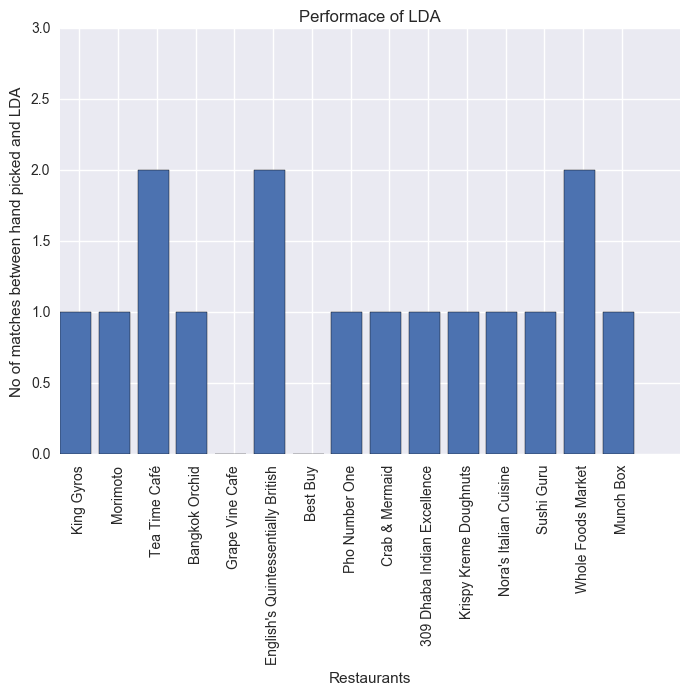

In [72]:
#print(score)
plt.bar(np.arange(len(score)),score)
plt.xticks(np.arange(len(score))+0.5,[restaurant_names[e] for e in Handpicked_topics["restaurants"]],rotation = 90)
plt.ylim(0,3)
plt.xlabel("Restaurants")
plt.ylabel("No of matches between hand picked and LDA")
plt.title("Performace of LDA")
plt.savefig("LDA",bbox_inches = "tight")
plt.show()